In [6]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import random

In [7]:
Word_Bank_File_Name = 'words.csv'

In [8]:
words=pd.read_csv(Word_Bank_File_Name)['words'].upper()

In [9]:
def unique(list1):
  
    
    unique_list = []
  
    
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
    

In [10]:
def getCharDistribution(word_list):
    Chars_List={}
    for word in words['words']:
        chars=unique([*word])
        for c in chars:
            if c not in Chars_List:
                Chars_List[c]=0
            Chars_List[c]+=1
    Sorted_Chars=dict(sorted(Chars_List.items(),key=lambda x:x[1],reverse=True))
    
    return Sorted_Chars
    




    

In [11]:
Sorted=getCharDistribution(words['words'])
for c in Sorted:
    print(str(c)+': '+str(Sorted[c]))

s: 5936
e: 5705
a: 5332
o: 3912
r: 3911
i: 3589
l: 3114
t: 3033
n: 2789
u: 2437
d: 2298
y: 2031
c: 1920
p: 1885
m: 1868
h: 1708
g: 1543
b: 1519
k: 1445
w: 1028
f: 990
v: 674
z: 391
j: 289
x: 287
q: 112


In [78]:
class WordleSim:
    
    ##Initializes the state 2D array, with [guess letter, state]
    ## 0: Not in Word
    ## 1: Yellow
    ## 2: Green
    ## 
    
    def __init__(self,word):
        self.source_word=word
        self.num_tries=0
        self.Game_State=[[]]
        self.win=False
        
        for i in range(0,4):
            self.Game_State.append(["",-1])
        

    def __str__(self, word):
        self.source_word=word.upper()
        self.num_tries=0
        
    def play(self,guess):
        Char_List=[*guess.upper()]
        
        for i in range(0,len(Char_List)):
            state_var=0
            if Char_List[i]==[*self.source_word][i]:
                state_var=2
                
            elif Char_List[i] in [*self.source_word]:
                state_var=1
            
            self.Game_State[i]=[Char_List[i],state_var]
            
        self.num_tries+=1
        
        #################
        
        if self.source_word==guess:
            self.win=True
            
            
        return self.Game_State, self.num_tries, self.win
        
    def getTries(self):
        return self.num_tries
    

In [31]:
Sim1=WordleSim("woven")
for i in range(0,5):
    print(Sim1.play(str(input())))

chair
([['c', 0], ['h', 0], ['a', 0], ['i', 0], ['r', 0]], 1, False)
bowse
([['b', 0], ['o', 2], ['w', 1], ['s', 0], ['e', 1]], 2, False)
women
([['w', 2], ['o', 2], ['m', 0], ['e', 2], ['n', 2]], 3, False)
evoke
([['e', 1], ['v', 1], ['o', 1], ['k', 0], ['e', 1]], 4, False)
woven
([['w', 2], ['o', 2], ['v', 2], ['e', 2], ['n', 2]], 5, True)


In [39]:
import random
class WordleSolver:


    def __init__(self, file_loc="words.txt"):
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')

        word_list.sort()
        self.word_list = word_list
    

    def generate(self):
        return random.choice(self.word_list)


    def update(self, info=[]):
        new_word_list = []
        for i,word in enumerate(self.word_list):
            f = 0
            for j,value in enumerate(info):
                letter = value[0]
                letter_info = value[1]

                if(letter in word):
                    if(letter_info==0):
                        f=1
                        break
                    elif(letter_info==1 and word[j]==letter):
                        f=1
                        break
                    elif(letter_info==2 and word[j]!=letter):
                        f=1
                        break
                else:
                    if(letter_info>=1):
                        f=1
                        break
            if(f==0):
                new_word_list.append(word)
        self.word_list = new_word_list
    
    def len_list(self):
        return len(self.word_list)
    
    def return_list(self):
        return self.word_list

In [125]:
#12000
Word_Bank_File_Name = 'words.csv'
words=pd.read_csv(Word_Bank_File_Name).dropna()['words'].str.upper()

#Historical Words
Historical_File_Name = 'historical.txt'
historicals_txt=open(Historical_File_Name,'r').readlines()[0]
historicals=pd.DataFrame(historicals_txt.split(" "),columns=['words'])['words']
    

#Historical_Test, any number of tries allowed.
def Any_Tries_Test(word_corpus):

    Avg_Tries=[]
    Big_Tries=[]

    for w in word_corpus:
        Hist_Sim=WordleSim(str(w))
        Hist_Solver=WordleSolver()


        while(Hist_Sim.win==False):
            Sim_Output=Hist_Sim.play(Hist_Solver.generate())
            Hist_Solver.update(Sim_Output[0])


        
        Avg_Tries.append(Hist_Sim.getTries())
        if(Hist_Sim.getTries()>10):
            Big_Tries.append(w)
    
    return Avg_Tries,Big_Tries
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Historicals Avg Tries: 4.901408450704225


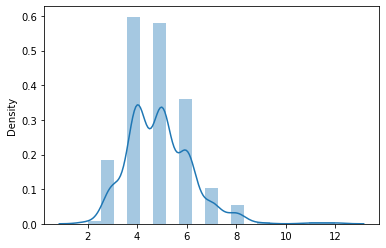

In [126]:
import seaborn as sns
Hist_Avg_Tries=Any_Tries_Test(historicals)[0]
sns.distplot(Hist_Avg_Tries)
print('Historicals Avg Tries: ' + str(np.mean(Hist_Avg_Tries)))

12,000 Avg Tries: 5.174734083551719
Words that took>10 tries['LOWES', 'WARKS', 'YACKS', 'FANGS', 'FAXED', 'PACKS', 'SANDS', 'ROWED', 'HARES', 'BONKS', 'MARES', 'CILLS', 'KALES', 'JOLES', 'MEALS', 'HOXED', 'KILLS', 'DITES', 'MOVES', 'GILLS', 'EALES', 'PILLS', 'PIPED', 'COWED', 'RAJES', 'NOOPS', 'SINKS', 'COLLS', 'PINTS', 'OINKS', 'TAWAS', 'WAILS', 'TESTS', 'GALLS', 'LAZES', 'FIGHT', 'RESTS', 'BENDS', 'MANES', 'FAZES', 'FARES', 'JESTS', 'HEATS', 'YORES', 'LATED', 'HORSE', 'BOCKS', 'DEXES', 'FINKS', 'SONGS', 'CANGS', 'GAMPS', 'BENTS', 'GINGS', 'WESTS', 'OVERS', 'BIGHT', 'SOWLS', 'MAKER', 'HANGS', 'YILLS', 'RINES', 'CONKS', 'LINES', 'ZOUKS', 'BODES', 'YOUKS', 'KELTS', 'SITES', 'TALER', 'BAYES', 'CINES', 'KESTS', 'BIKED', 'SADES', 'FEARS', 'JOCKS', 'WAKES', 'HONES', 'LAUDS', 'MAZED', 'LANES', 'SACKS', 'MODES', 'GUMPS', 'FEALS', 'MALLS', 'GALES', 'GANGS', 'BESTS', 'ZILLS', 'RASES', 'ROSES', 'RAKED', 'HIGHT', 'LAVED', 'CORES', 'FALLS', 'DARES', 'KOKER', 'TARES', 'KANGS', 'CHIPS', 'TENDS']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


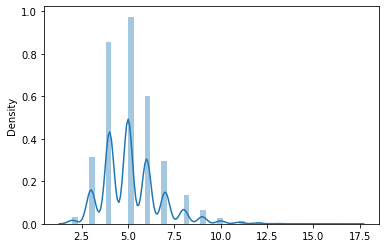

In [87]:
Full_Avg_Tries=Any_Tries_Test(words)
sns.distplot(Full_Avg_Tries[0])
print('12,000 Avg Tries: ' + str(np.mean(Full_Avg_Tries[0])))
print('Words that took >10 tries'+str(Full_Avg_Tries[1]))

In [93]:
#Historical_Test, 6 tries allowed

def Six_Tries_Test(word_corpus):
    
    Avg_Tries=[]
    Success_Counter=0

    for w in word_corpus:

        Hist_Sim=WordleSim(str(w))
        Hist_Solver=WordleSolver()

        while(Hist_Sim.num_tries<6):
            Sim_Output=Hist_Sim.play(Hist_Solver.generate())
            Hist_Solver.update(Sim_Output[0])

            if(Hist_Sim.win==True):
                Success_Counter+=1
                break
                
    return Success_Counter, Success_Counter/len(word_corpus)

In [94]:
print(Six_Tries_Test(historicals))

(369, 0.8661971830985915)


In [96]:
print(Six_Tries_Test(words))

(10755, 0.828965623554802)


In [121]:
def Get_New_Corpus(word_corpus,state):
    
    New_Corpus=[]
    Rejected_Words=[]
    Zero_Letters=[]
    
    for i in range(0,5):
        if state[i][1]<=0:
            Zero_Letters.append(state[i][0])
    
    for word in word_corpus:
        
        for letter in Zero_Letters:
            if letter in word:
                Rejected_Words.append(letter)
            else:
                New_Corpus.append(letter)
            
    return New_Corpus
            
        

In [135]:
from wordfreq import word_frequency as wf


def getMaxFreq(word_corpus):
    
    Old=wf(word_corpus[0],'en')
    Word_Track=word_corpus[0]
    
    for word in word_corpus:
        New=max(wf(word,'en'),Old)
        if(New>Old):
            Word_Track=word
        
        Old=New
        
    return Word_Track
        
class Freq_WordleSolver:

    def __init__(self, file_loc="words.txt"):
        with open(file_loc,'r') as f:
            word_list = f.read().upper().split('\n')

        word_list.sort()
        self.word_list = word_list
    
    def generate(self):
        return getMaxFreq(self.word_list)

    
    
    
    def update(self, info=[]):
        new_word_list = []
        for i,word in enumerate(self.word_list):
            f = 0
            for j,value in enumerate(info):
                letter = value[0]
                letter_info = value[1]

                if(letter in word):
                    if(letter_info==0):
                        f=1
                        break
                    elif(letter_info==1 and word[j]==letter):
                        f=1
                        break
                    elif(letter_info==2 and word[j]!=letter):
                        f=1
                        break
                else:
                    if(letter_info>=1):
                        f=1
                        break
            if(f==0):
                new_word_list.append(word)
        self.word_list = new_word_list
    
    def len_list(self):
        return len(self.word_list)
    
    def return_list(self):
        return self.word_list
        
        

    

In [139]:
###Now for Word Freq Engine

def Any_Tries_Test2(word_corpus):

    Avg_Tries=[]
    Big_Tries=[]

    for w in word_corpus:
        Hist_Sim=WordleSim(str(w))
        Hist_Solver=Freq_WordleSolver()


        while(Hist_Sim.win==False):
            Sim_Output=Hist_Sim.play(Hist_Solver.generate())
            Hist_Solver.update(Sim_Output[0])


        
        Avg_Tries.append(Hist_Sim.getTries())
        if(Hist_Sim.getTries()>10):
            Big_Tries.append(w)
    
    return Avg_Tries,Big_Tries

def Six_Tries_Test2(word_corpus):
    
    Avg_Tries=[]
    Success_Counter=0

    for w in word_corpus:

        Hist_Sim=WordleSim(str(w))
        Hist_Solver=Freq_WordleSolver()

        while(Hist_Sim.num_tries<6):
            Sim_Output=Hist_Sim.play(Hist_Solver.generate())
            Hist_Solver.update(Sim_Output[0])

            if(Hist_Sim.win==True):
                Success_Counter+=1
                break
                
    return Success_Counter, Success_Counter/len(word_corpus)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Word Frequency Model (Using PyPi wordfreq)
Historicals Avg Tries: 4.122065727699531

Historicals: Successes in 6 tries
(414, 0.971830985915493)


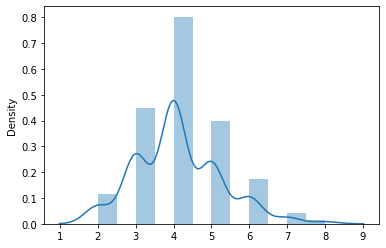

In [142]:
Hist_Avg_Tries=Any_Tries_Test2(historicals)[0]
sns.distplot(Hist_Avg_Tries)
print('Word Frequency Model (Using PyPi wordfreq)')
print('Historicals Avg Tries: ' + str(np.mean(Hist_Avg_Tries)))
print()
print('Historicals: Successes in 6 tries')
print(Six_Tries_Test2(historicals))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Word Frequency Model (Using PyPi wordfreq)
12,000 Avg Tries: 5.087405580391552

12,000: Successes in 6 tries
(11081, 0.8540928009865886)


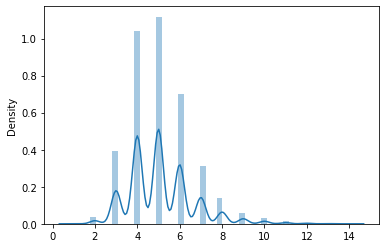

In [144]:
Hist_Avg_Tries=Any_Tries_Test2(words)[0]
sns.distplot(Hist_Avg_Tries)
print('Word Frequency Model (Using PyPi wordfreq)')
print('12,000 Avg Tries: ' + str(np.mean(Hist_Avg_Tries)))
print()
print('12,000: Successes in 6 tries')
print(Six_Tries_Test2(words))

In [145]:
print(Any_Tries_Test2(words)[1])

['ZAXES', 'JARKS', 'RONES', 'RARKS', 'WHISS', 'KACKS', 'TACES', 'PIGHT', 'PATES', 'PIZES', 'SISES', 'WITES', 'KARKS', 'CATES', 'WARED', 'YITES', 'LEARS', 'EALES', 'NAKER', 'CAMES', 'RATER', 'MOLED', 'WIZES', 'FAINS', 'KINES', 'ZINGS', 'DIGHT', 'ZESTS', 'NARES', 'LANTS', 'VALES', 'DINKS', 'LILLS', 'FINKS', 'GATER', 'CANGS', 'MAWED', 'WAIRS', 'ZEALS', 'WEALS', 'LARES', 'FANES', 'YILLS', 'VANTS', 'JEATS', 'RINES', 'MARTS', 'SAZES', 'KELTS', 'GARES', 'VANGS', 'WAMES', 'WAWES', 'KESTS', 'WENTS', 'SADES', 'STAIG', 'RAXES', 'SAMES', 'KAILS', 'TAJES', 'PONES', 'COZED', 'NATES', 'ZILLS', 'RASES', 'LAWED', 'DEARS', 'VARES', 'LAVED', 'NAVES', 'DATER', 'MECKS', 'RATCH', 'SINES', 'VAILS']
